In [1]:
#importamos las librerias
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/attacks.csv', encoding='utf-8', encoding_errors='ignore') #cargamos el archivo

# Primera exploración

In [3]:
data.head() #primera visualización

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,AdysonMcNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
columns = data.columns

# Quitar los espacio en los nombres de las columnas
new_columns = [col.replace(' ', '') for col in columns]

# Renombrar las columnas
data = data.rename(columns=dict(zip(columns, new_columns)))

In [5]:
data.shape # dimensiones del archivo

(25723, 24)

In [6]:
data.info() # información de cada columna y su tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseNumber            8702 non-null   object 
 1   Date                  6302 non-null   object 
 2   Year                  6300 non-null   float64
 3   Type                  6298 non-null   object 
 4   Country               6252 non-null   object 
 5   Area                  5847 non-null   object 
 6   Location              5762 non-null   object 
 7   Activity              5758 non-null   object 
 8   Name                  6092 non-null   object 
 9   Sex                   5737 non-null   object 
 10  Age                   3471 non-null   object 
 11  Injury                6274 non-null   object 
 12  Fatal(Y/N)            5763 non-null   object 
 13  Time                  2948 non-null   object 
 14  Species               3464 non-null   object 
 15  InvestigatororSourc

In [7]:
data.tail() # las filas del final estan llenas de nulos

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
nan_cols = data.isna().mean() * 100  # porcentaje de nulo en cada columna
nan_cols[nan_cols>0]

CaseNumber              66.170353
Date                    75.500525
Year                    75.508300
Type                    75.516075
Country                 75.694903
Area                    77.269370
Location                77.599813
Activity                77.615364
Name                    76.316915
Sex                     77.697003
Age                     86.506240
Injury                  75.609377
Fatal(Y/N)              77.595926
Time                    88.539439
Species                 86.533453
InvestigatororSource    75.566614
pdf                     75.500525
hrefformula             75.504412
href                    75.500525
CaseNumber.1            75.500525
CaseNumber.2            75.500525
originalorder           75.473312
Unnamed:22              99.996112
Unnamed:23              99.992225
dtype: float64

In [9]:
# función para checkear la cantidad de nulos
def check_nan(data: pd.DataFrame):  
    plt.figure(figsize=(10, 6))

    sns.heatmap(data.isna(),    
                yticklabels=False,  
                cmap='viridis',     
                cbar=False,         
               )


    plt.show();

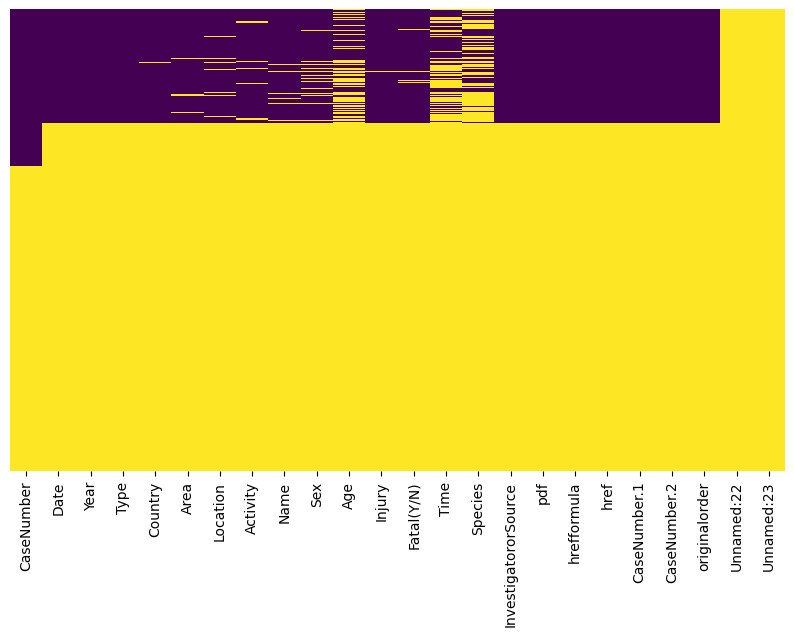

In [10]:
check_nan(data)

In [11]:
data.dropna(how='all', inplace=True) #borramos todas las filas que tengan nulos

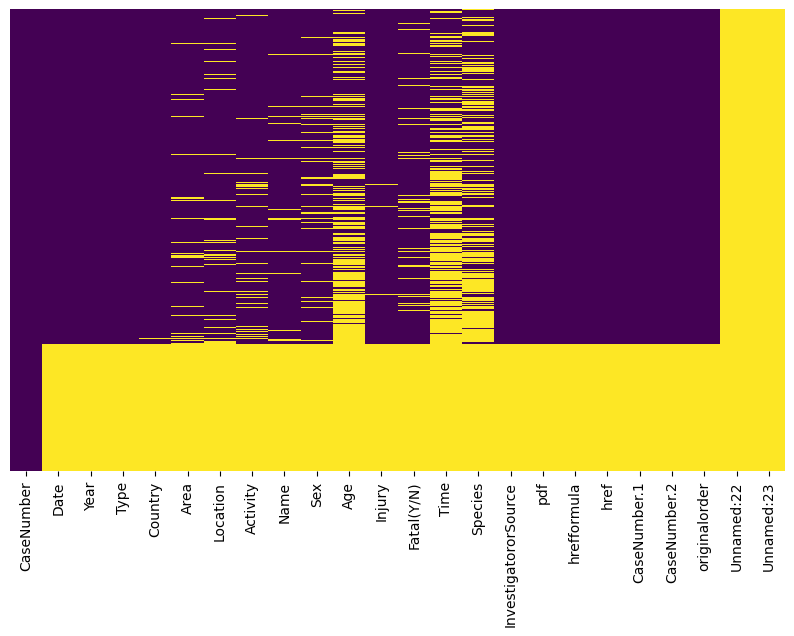

In [12]:
check_nan(data)

In [13]:
nan_cols = data.isna().mean() * 100  # porcentaje de nulo en cada columna
nan_cols[nan_cols>0]                 #las dos últimas dolumnas son nulas en un 99% y no son relevantes en este análisis

CaseNumber               0.011490
Date                    27.588188
Year                    27.611169
Type                    27.634149
Country                 28.162703
Area                    32.816270
Location                33.792945
Activity                33.838906
Name                    30.001149
Sex                     34.080202
Age                     60.117201
Injury                  27.909916
Fatal(Y/N)              33.781455
Time                    66.126623
Species                 60.197633
InvestigatororSource    27.783523
pdf                     27.588188
hrefformula             27.599678
href                    27.588188
CaseNumber.1            27.588188
CaseNumber.2            27.588188
originalorder           27.507756
Unnamed:22              99.988510
Unnamed:23              99.977019
dtype: float64

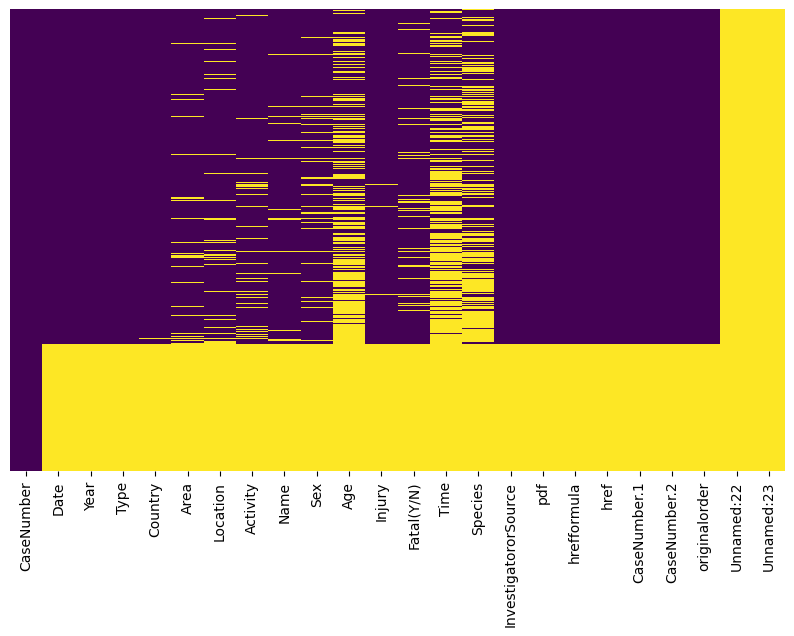

In [14]:
check_nan(data)

In [15]:
subset = data[['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal(Y/N)']]
subset.duplicated().any()   # Comprobamos si existen duplicadas


True

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.tail(10)

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0,NaN,NaN
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0,NaN,NaN
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0,NaN,NaN
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,NaN,NaN
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.drop([6302, 6303, 6304, 6305,6306,6307, 6308,6309,25722], inplace=True) #borramos aquellas restantes que no son relevantes

In [19]:
data.tail()

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8N, 79W",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


# Limpieza de la columna Area

In [20]:
# Vamos a reemplazar aquellos valores nulos de la columna Area por "somewhere in" + "Country"
data['Area'] = data['Area'].fillna('somewhere in ' + data['Country'].astype(str))


# Limpieza columna Fatal(Y/N)


In [21]:
data['Fatal(Y/N)'] = data['Fatal(Y/N)'].astype(str)    #cambio el tipo de la columna a string
data['Injury'] = data['Injury'].astype(str)            


In [22]:
# Si la palabra "FATAl" se encuentra en la columna Injury se rellenaran los valores nulos con Y, sino se pondrá N
data['Fatal(Y/N)'] = data.apply(lambda x: "Y" if "FATAL" in x['Injury'] else "N" if pd.isnull(x['Fatal(Y/N)']) else x['Fatal(Y/N)'], axis=1)


# Limpieza columna Location

In [23]:
# Rellenamos rellenamos los valores nulos de la columna Location con los valores de Area
data['Location'].fillna(data['Area'], inplace=True)


# Limpieza columna Country

In [24]:
# Rellenamos los valores nulos de Country con "Unknown"
data['Country'] = data['Country'].fillna('unknown')

# Limpieza columna Sex

In [25]:
# Contar el número de veces que se repite de cada valor en la columna 'Sex'
conteo_sexo = data['Sex'].value_counts()
conteo_sexo

M      5094
F       637
M         2
N         2
lli       1
.         1
Name: Sex, dtype: int64

In [26]:
# Obtener los valores de la columna Sex que aparecen menos de tres veces
valores_filtrados_sexo = conteo_sexo[conteo_sexo < 3].index.tolist()
valores_filtrados_sexo

['M ', 'N', 'lli', '.']

In [27]:
# Reemplazar los valores que aparecen menos de tres veces por 'unknown'
data['Sex'] = data['Sex'].replace(valores_filtrados_sexo, 'unknown')

In [28]:
# Rellenamos los valores nulos de Sex con "Unknown"
data['Sex'] = data['Sex'].fillna('unknown')

In [29]:
data.Sex.value_counts()

M          5094
F           637
unknown     571
Name: Sex, dtype: int64

# Limpieza columna Activity

In [30]:
data.Activity.value_counts().head(10)

Surfing         971
Swimming        869
Fishing         431
Spearfishing    333
Bathing         162
Wading          149
Diving          127
Standing         99
Snorkeling       89
Scuba diving     76
Name: Activity, dtype: int64

In [31]:
# Tenemos demasiadas subcategorías, las cuales podrían sintetizarse en algunas categorías más generales
reemplazos = {'surf': 'Surfing', 'swim': 'Swimming', 'fishing': 'Fishing', 'spearfish': 'Spearfishing', 'bath': 'Bathing', 'wade': 'Wading', 'dive': 'Diving', 'stand': 'Standing', 'snorkel': 'Snorkeling'}

for i in range(len(data['Activity'])):
    if isinstance(data['Activity'].iloc[i], str):
        for palabra in reemplazos:
            if palabra in data['Activity'].iloc[i]:
                data['Activity'].iloc[i] = reemplazos[palabra]
                break

data['Activity'] = data['Activity'].replace(reemplazos.values(), reemplazos.keys())




C:\Users\javir\AppData\Local\Temp\ipykernel_12220\322949044.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Activity'].iloc[i] = reemplazos[palabra]


In [32]:
data.Activity.value_counts().head(10)

surf             1160
fishing           962
swim              912
bath              169
wade              149
dive              139
stand             114
snorkel            94
Scuba diving       76
Body boarding      61
Name: Activity, dtype: int64

In [33]:
data['Activity'] = data['Activity'].fillna('unknown') #rellenamos los nulos con unknown

# Limpieza columna Date

In [34]:
# Convertir la columna a formato de fecha y hora
data["CaseNumber"] = pd.to_datetime(data["CaseNumber"], errors='coerce')

# rellenar los valores nulos con el valor más reciente
data["CaseNumber"].fillna(method="ffill", inplace=True)

# Convertir la fecha a un formato estándar
data["Date"] = data["CaseNumber"].apply(lambda x: x.strftime("%Y-%m-%d %H:%M:%S"))

# Limpieza columnas Unnamed

In [35]:
data['Unnamed:22'] = data['Unnamed:22'].fillna('unnamed')

In [36]:
data['Unnamed:23'] = data['Unnamed:23'].fillna('unnamed')

# Limpieza columna Investigator or Source

In [37]:
data['InvestigatororSource'] = data['InvestigatororSource'].fillna('unknown')

# Limpieza columna Edad

In [38]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce') #Pasamos todos los números a numéricos
                                                          #convertimos a nulos aquellos valores que no sean números
# Calcular la mediana de la columna 'Edad'
mediana = data['Age'].median()

print("La mediana de las edades es:", mediana)


La mediana de las edades es: 24.0


# Limpieza columna Time

In [39]:
# Calcular la moda de la columna "edad"
moda = data['Time'].mode()

# Imprimir la moda
print('La moda de la columna "Time" es:', moda)

La moda de la columna "Time" es: 0    Afternoon
Name: Time, dtype: object


# Limpieza columna Species

In [40]:
# Calcular la moda de la columna "edad"
moda = data['Species'].mode()

# Imprimir la moda
print('La moda de la columna "Species" es:', moda)

La moda de la columna "Species" es: 0    White shark
Name: Species, dtype: object


# Limpieza columna Type

In [41]:
data.Type.value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [42]:
# categorizamos en 3 tipos de columnas: Attacks, Accidents, Unknown
for i in range(len(data['Type'])):
    if data['Type'][i] in ['Questionable', 'Boatomg']:
        pass
    elif data['Type'][i] in ['Unprovoked', 'Provoked']:
        data['Type'][i] = 'Attacks'
    elif data['Type'][i] in ['Sea Disaster', 'Boating']:
        data['Type'][i] = 'Accidents'
    else:
        data['Type'][i] = 'Unknown'


C:\Users\javir\AppData\Local\Temp\ipykernel_12220\1012008313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'][i] = 'Accidents'
C:\Users\javir\AppData\Local\Temp\ipykernel_12220\1012008313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'][i] = 'Attacks'
C:\Users\javir\AppData\Local\Temp\ipykernel_12220\1012008313.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'][i] = 'Unknown'


In [43]:
conteo_type= data.Type.value_counts()

In [44]:
# Rellenamos los valores nulos de Sex con "Unknown"
valores_filtrados_type = conteo_type[conteo_type < 3].index.tolist()
data.loc[data['Type'].isin(valores_filtrados_type), 'Type'] = 'unknown'


In [45]:
data.Type.value_counts()

Attacks      5169
Unknown       688
Accidents     442
unknown         3
Name: Type, dtype: int64

# Resto de columnas

In [46]:
data['Name'] = data['Name'].fillna('unknown')

In [47]:
data['Age'] = data['Age'].fillna('-1')

In [48]:
data['Time'] = data['Time'].fillna('-1')

In [49]:
data['Species'] = data['Species'].fillna('unknown')

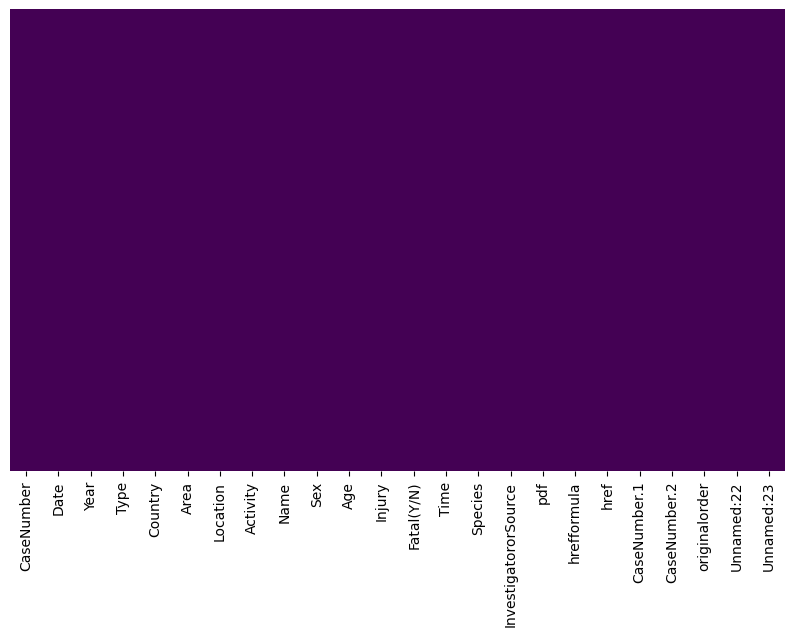

In [50]:
check_nan(data)

In [53]:
data.head(10)

,CaseNumber,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,InvestigatororSource,pdf,hrefformula,href,CaseNumber.1,CaseNumber.2,originalorder,Unnamed:22,Unnamed:23
0,2018-06-25,2018-06-25 00:00:00,2018.0,Accidents,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,unnamed,unnamed
1,2018-06-18,2018-06-18 00:00:00,2018.0,Attacks,USA,Georgia,"St. Simon Island, Glynn County",stand,AdysonMcNeely,F,...,unknown,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,unnamed,unnamed
2,2018-06-09,2018-06-09 00:00:00,2018.0,Unknown,USA,Hawaii,"Habush, Oahu",surf,John Denges,M,...,unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,unnamed,unnamed
3,2018-06-08,2018-06-08 00:00:00,2018.0,Attacks,AUSTRALIA,New South Wales,Arrawarra Headland,surf,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,unnamed,unnamed
4,2018-06-04,2018-06-04 00:00:00,2018.0,Attacks,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,unnamed,unnamed
5,2018-06-04,2018-06-04 00:00:00,2018.0,Attacks,AUSTRALIA,New South Wales,"Flat Rock, Ballina",surf,Chris,M,...,unknown,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.b,2018.06.03.b,6298.0,unnamed,unnamed
6,2018-06-04,2018-06-04 00:00:00,2018.0,Attacks,BRAZIL,Pernambuco,"Piedade Beach, Recife",swim,Jose Ernesto da Silva,M,...,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,unnamed,unnamed
7,2018-05-27,2018-05-27 00:00:00,2018.0,Attacks,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",fishing,male,M,...,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,unnamed,unnamed
8,2018-05-27,2018-05-27 00:00:00,2018.0,Attacks,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,unnamed,unnamed
9,2018-05-27,2018-05-27 00:00:00,2018.0,Attacks,USA,Florida,"Daytona Beach, Volusia County",stand,male,M,...,unknown,"K. McMurray, Tracking Sharks.com",2018.05.26.a-DaytonaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.a,2018.05.26.a,6294.0,unnamed,unnamed


In [52]:
data.shape

(6302, 24)

In [54]:
data.to_csv("attacks_clean.csv", index=False)
